In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 20, 10

In [2]:
from wikipedia2vec import Wikipedia2Vec

In [3]:
from naive_bayes_classifier.configure import STOP_CHARS

In [4]:
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm

In [5]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [6]:
def evaluate(y_true, y_pred):
    print(f"""acuracy: {accuracy_score(y_true, y_pred)}
    precision: {precision_score(y_true, y_pred, average="micro")}
    recall: {recall_score(y_true, y_pred, average="micro")}
    f1: {f1_score(y_true, y_pred, average="micro")}""")

In [7]:
w2v_model = Wikipedia2Vec.load("../enwiki_20180420_win10_500d.pkl")

In [8]:
with open("rst.pkl", "rb") as fp:
    rst_lst = pickle.load(fp)

In [9]:
vec_lst = []
for itm in tqdm(rst_lst):
    txt = itm[2].lower()
    
    for c in STOP_CHARS:
        txt = txt.replace(c, "")
    
    wd_lst = txt.split(" ")
    
    vec = np.zeros((500,))
    for wd in wd_lst:
        try:
            vec += w2v_model.get_word_vector(wd)
        except KeyError:
            pass
    
    vec_lst.append(vec)

100%|█████████████████████████████████████████████████████████| 774/774 [01:05<00:00, 11.78it/s]


In [10]:
X = np.vstack(vec_lst)

In [11]:
y = np.load("y.pkl", allow_pickle=True)

In [12]:
y_raw = np.load("y_raw.pkl", allow_pickle=True)

In [13]:
y.shape

(774,)

In [14]:
X.shape

(774, 500)

In [15]:
from naive_bayes_classifier.back_test_utils import *

In [16]:
from sklearn.ensemble import *

In [17]:
y_pred4 = rolling_test_single(ExtraTreesClassifier(n_estimators=50, n_jobs=-1), X, y, 200)

In [18]:
evaluate(y, y_pred4)

acuracy: 0.5930232558139535
    precision: 0.5930232558139535
    recall: 0.5930232558139535
    f1: 0.5930232558139535


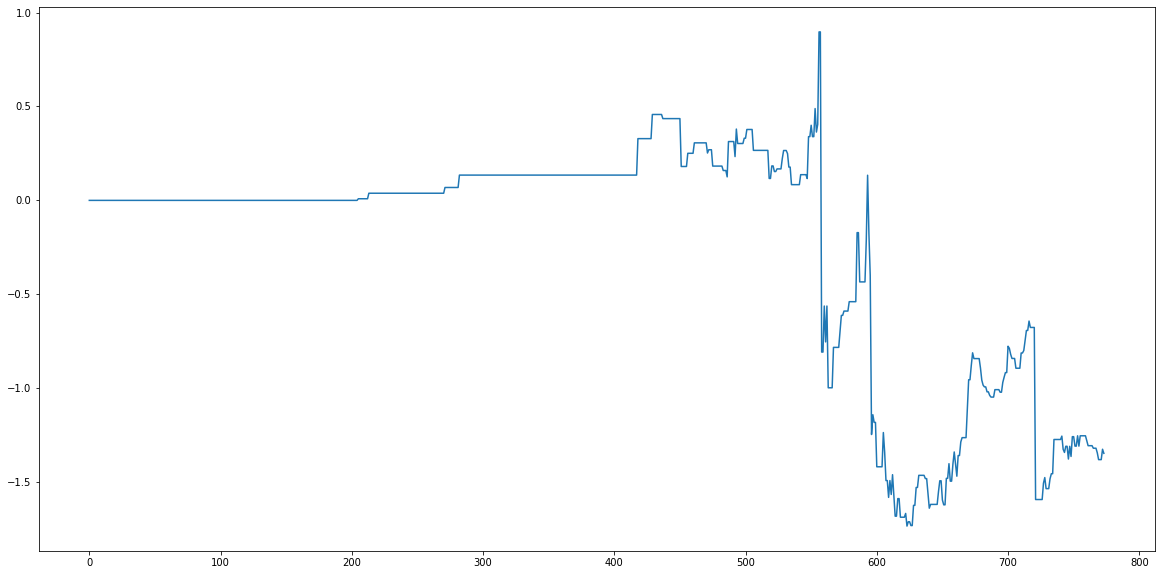

In [23]:
plt.plot(np.cumsum(y_raw * y_pred4))